## Purpose of Project:

Using the dataset with stock trade information, I will attempt to apply machine learning to determine what feature(s) predict whether a contract was a win or loss. This could potentially allow me to aid financial/stock advisors in determining patterns in the stock market to know when to make a certain action for the maximum monetary gain.

Dataset: [MUHAMMAD ANAS-Tradyflow - Options Trading!](https://www.kaggle.com/datasets/muhammadanas0716/tradyflow-options-trading)

In [1]:
#imports 

import numpy as np
import pandas as pd

In [2]:
title = "Trady Flow - Best Options Trade Ideas.csv"
df = pd.read_csv(title)
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,Call,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,Call,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,Put,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,Put,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1


## Data Exploration

In [3]:
#find null values

df.isnull().any()

Time       False
Sym        False
C/P        False
Exp        False
Strike     False
Spot       False
BidAsk     False
Orders     False
Vol        False
Prems      False
OI         False
Diff(%)    False
ITM        False
dtype: bool

Although split is 3:5, the number of data points is in the thousands, whihc is more than sufficient for the model to train on.

"at least ten times as many data points as there are features in your dataset." - graphite note

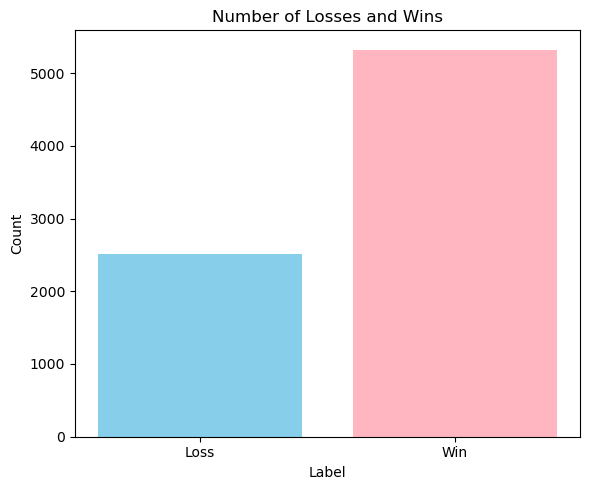

In [4]:
# bar graph of ITM split 

#distribution of sarcasm/non-sarcasm
import matplotlib.pyplot as plt

# Assuming the first column contains the labels (good or bad)
labels = df.iloc[:, -1]

# Count the number of loss/win
Loss = (labels == 0).sum()
Win = (labels == 1).sum()

# Create a list for categories
categories = ["Loss", "Win"]

# Create a list for counts
counts = [Loss, Win]

# Create the bar chart
plt.figure(figsize=(6, 5)) 
plt.bar(categories, counts, color=['skyblue', 'lightpink'])  
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Losses and Wins")
plt.xticks(rotation=0)  
plt.tight_layout()


plt.show()

In [6]:
#change C/P to binary (one hot encoding)

#2 - Make dictionary

CP_labels_to_numbers = {
    "Call" : 0,
    "Put" : 1
}

# Directly replace labels with numbers using dictionary lookup
df["C/P"] = df["C/P"].replace(CP_labels_to_numbers)

#make updated csv
df.to_csv("Trady Flow_MT_encode.csv", index = False)

#open new csv

df = pd.read_csv("Trady Flow_MT_encode.csv")

df



,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1


Here, I want to convert values with K to their propernumerical format. I should multiply the values by 1000 in columns Vol and OI

In [23]:
#remove K
# Extract numbers using regular expression
df['Prems'] = df['Prems'].str.extract('(\d+)')
df['OI'] = df['OI'].str.extract('(\d+)')
df['Vol'] = df['Vol'].str.extract('(\d+)')
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,360,183,4,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,634,310,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,800,281,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,722,198,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6,501,8,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,626,291,8,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1,188,10,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,692,747,4,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,857,467,3,8.92,1


In [29]:
df.sum()

Time       6/17/2022 15:076/17/2022 15:056/17/2022 14:516...
Sym        ISEECVNAPTLOTWLOATUSWEFSRPINSETWFCHSBCLMTHOGCM...
C/P                                                     2750
Exp        10/21/20221/19/20242/17/20236/24/20229/16/2022...
Strike                                            1183272.88
Spot                                               1163056.9
BidAsk                                              33035.02
Orders                                                 55646
Vol                                                  1897084
Prems                                                2526814
OI                                                    841975
Diff(%)                                             89835.37
ITM                                                     5321
dtype: object

In [38]:
#change object datatype to integer:

import pandas as pd


cols_to_convert = ['Vol', 'Prems', 'OI']  # Replace with your actual column names

df[cols_to_convert] = df[cols_to_convert].astype(pd.Int64Dtype())

df


,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,360,183,4,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,634,310,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,800,281,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,722,198,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6,501,8,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,626,291,8,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1,188,10,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,692,747,4,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,857,467,3,8.92,1


In [28]:
df.dtypes

Time        object
Sym         object
C/P          int64
Exp         object
Strike     float64
Spot       float64
BidAsk     float64
Orders       int64
Vol          Int64
Prems        Int64
OI           Int64
Diff(%)    float64
ITM          int64
dtype: object

I also want to try to change features "time","symb",and "exp" into integer/float format

## Statistical Analysis

Feature selection

1) Are categorical classes significantly different from each other? - t-test

2) Are the features significantly different from target variable? - t-test

## Logistic vs Lasso Regression

Code referenced: [Susan Li -Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

a) Logistic Regression

In [14]:
df.iloc[:,-1:]

,ITM
0,0
1,0
2,0
3,0
4,0
...,...
7822,1
7823,1
7824,1
7825,1


In [43]:
#set variables (not official but just a test run)

X = df.iloc[:,4:-1]
y = df.iloc[:,-1:]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\journ\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\journ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51       512
           1       0.76      0.91      0.83      1054

    accuracy                           0.74      1566
   macro avg       0.72      0.66      0.67      1566
weighted avg       0.73      0.74      0.72      1566



b) Lasso regression

shrinks features with low coefficents to zero an dkeeps few correlated variables, which simplifies dataset BUT may remove useful info -> lower accuracy

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)

Lasso()

In [55]:
y_pred = lassoreg.predict(X_test)
print('Accuracy of lasso regression classifier on test set: {:.2f}'.format(lassoreg.score(X_test, y_test)))

Accuracy of lasso regression classifier on test set: 0.13


c) Analyze coefficients and scores